In [15]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv("C:/Users/edenl/Desktop/file_rouge/notebook/original_data/heart_data.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [17]:
class analyzing_data: 
    def __init__(self,df):
        self.df = df
    def info_about_the_data(self):
 
       
        print(f'\n \n Number of rows : {self.df.shape[0]} \n \n')
    
      
        print(f'\n \n Number of column : {self.df.shape[1]}\n \n')
    
        print(f'\n \n Number of Nan : {self.df.isnull().sum().sum()}\n \n')
        
        print(f"\n \nNumber of duplicates : {self.df.duplicated()}\n \n")
        print(f'\n \nInfo on the dataset : {self.df.info()}\n \n')
        #data_summary =  

        describe =  self.df.describe() 
        print(f'\nDescriptive of the dataset : \n' +  f'\n{describe} \n \n')

        #d_types_column = self.df.dtypes()
        #print(f'\n{d_types_column}\n \n')

        print(f'\n \n Types of column in the dataset : \n \n')
        d_types = self.df.dtypes.value_counts()
        print(f'\n \n{d_types}\n \n')
        
        # Total null values by each categories
        print(f'\n \n Number of Nan by column : \n \n')
        null_values = self.df.isnull().sum().sort_values() 
        print(f'\n{null_values} \n \n')

        df_nan = pd.DataFrame({'Nan':df.isna().sum()})
        df_nan['%nan'] = df_nan['Nan']/df.shape[0]*100
        T =round(df_nan,2).sort_values(by='%nan' , ascending=False)
        print(T)
       
        

In [18]:
test_obj = analyzing_data(df)  
test_obj.info_about_the_data()


 
 Number of rows : 918 
 


 
 Number of column : 12
 


 
 Number of Nan : 0
 


 
Number of duplicates : 0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-n

In [19]:
categ = ["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS" , "RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [21]:
cleaned_df = df.to_csv("C:/Users/edenl/Desktop/file_rouge/notebook/original_data/clean_heart_failure_data.csv")

In [24]:
class DataVisualisation:
    
    def __init__(self,df):
        self.df = df
    
    def info(self): 

    
        #looks if the target is balanced 
        df["HeartDisease"].value_counts().plot.pie()

        #look for the outliers 
        df.plot(kind="box" , subplots=True , figsize=(15,15) , title="Found Outliers")
        
           #

        

        #plot every features of the dataframe to be able to visualize them
        for column in df:
            df[column].value_counts().sort_index(axis=0).plot(kind='bar')
            plt.title(column)
            plt.show()

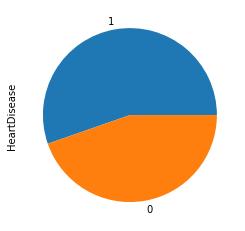

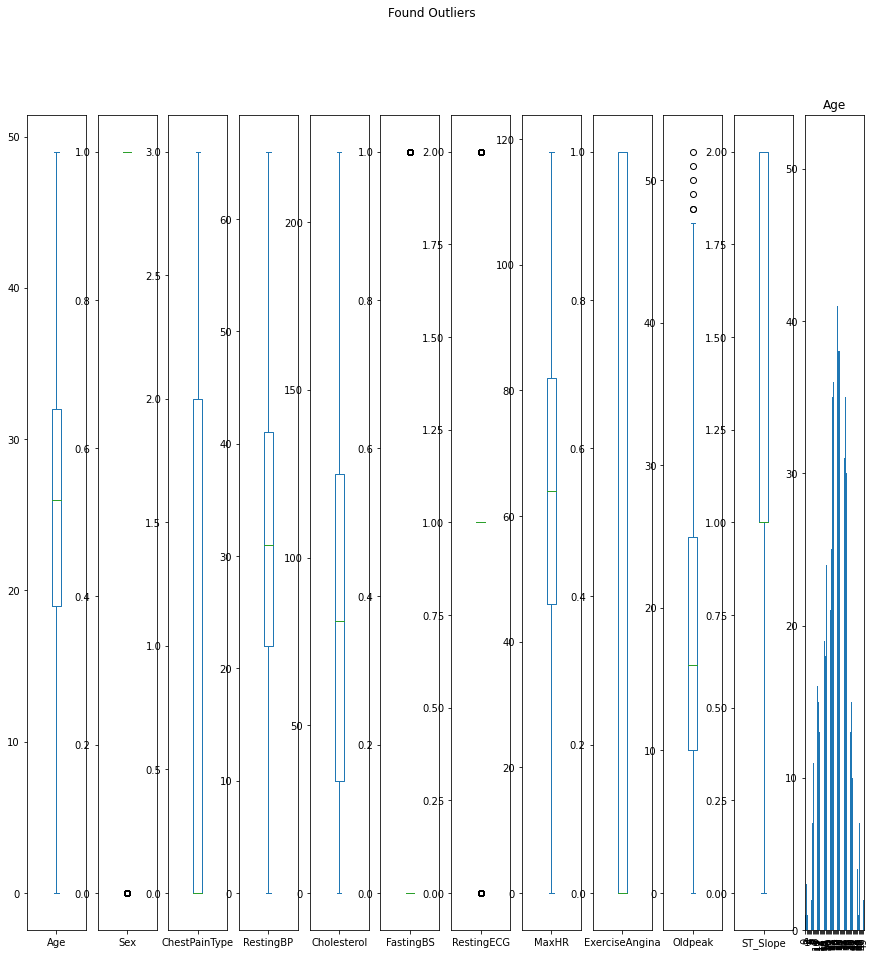

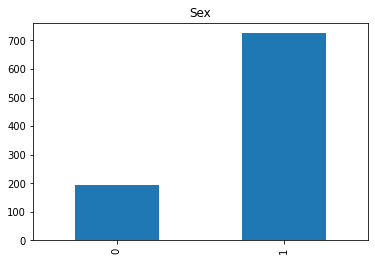

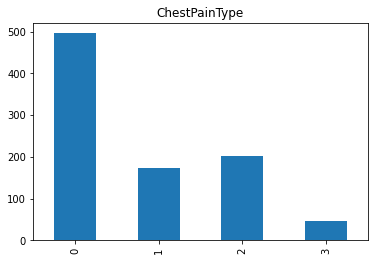

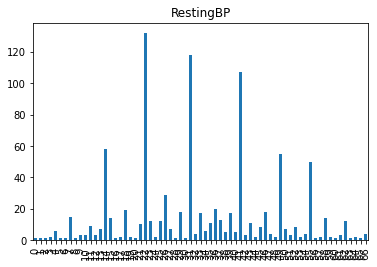

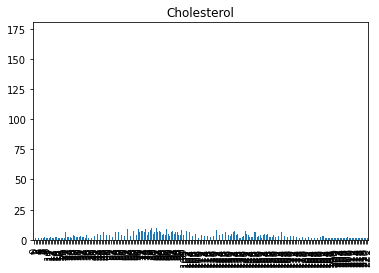

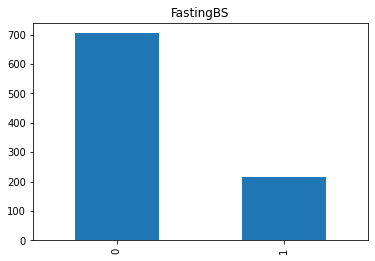

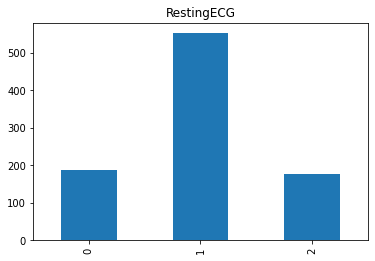

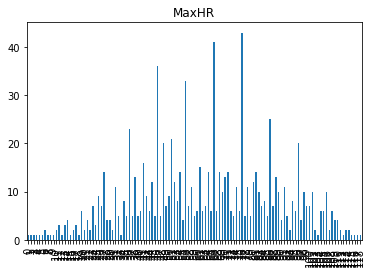

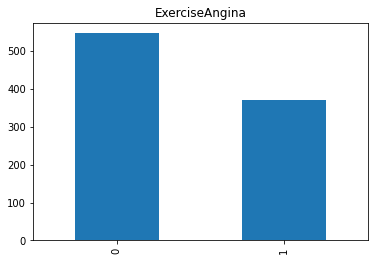

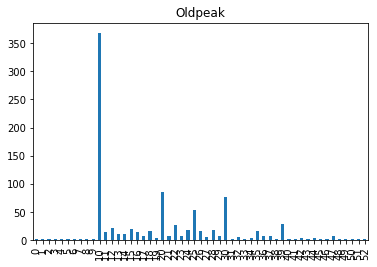

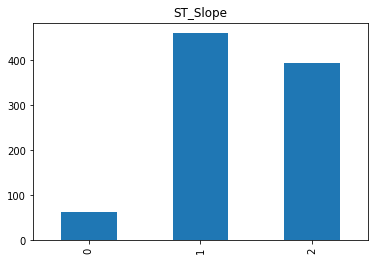

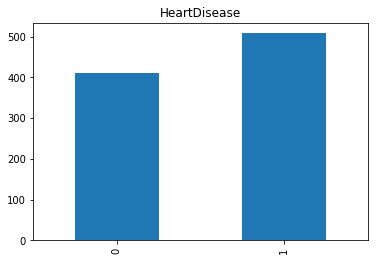

In [25]:
test_obj = DataVisualisation(df)
test_obj.info()
#target not balanced